In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score


In [53]:
##  DATA LOADING  ##

In [54]:
data = pd.read_csv(r"C:\Users\harid\OneDrive\Desktop\data sets\zomato_restaurants_in_India.csv")

In [55]:
## DATA INSPECTION  ##
data = data.drop(columns = ['country_id','opentable_support','takeaway','establishment'])

In [56]:
data.head()

,res_id,name,url,address,city,city_id,locality,latitude,longitude,zipcode,...,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,delivery
0,3400299,Bikanervala,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,...,8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1
1,3400005,Mama Chicken Mama Franky House,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001.0,...,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,-1
2,3401013,Bhagat Halwai,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010.0,...,9:30 AM to 11 PM,300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,1
3,3400290,Bhagat Halwai,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002.0,...,8am – 11pm (Mon-Sun),300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,1
4,3401744,The Salt Cafe Kitchen & Bar,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,NaN,...,11:30 AM to 11:30 PM,1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,1


In [57]:
data.tail()

,res_id,name,url,address,city,city_id,locality,latitude,longitude,zipcode,...,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,delivery
211939,3202251,Kali Mirch Cafe And Restaurant,https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,390024.0,...,"11am – 3pm, 7pm – 11:30pm (Mon-Sun)",600,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,-1
211940,3200996,Raju Omlet,https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,NaN,...,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...",300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,1
211941,18984164,The Grand Thakar,https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,NaN,...,"11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,-1
211942,3201138,Subway,https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,NaN,...,8 AM to 1 AM,500,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,1
211943,18879846,Freshco's - The Health Cafe,https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,390007.0,...,7am – 11pm (Mon-Sun),600,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,1


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   url                   211944 non-null  object 
 3   address               211810 non-null  object 
 4   city                  211944 non-null  object 
 5   city_id               211944 non-null  int64  
 6   locality              211944 non-null  object 
 7   latitude              211944 non-null  float64
 8   longitude             211944 non-null  float64
 9   zipcode               48757 non-null   object 
 10  locality_verbose      211944 non-null  object 
 11  cuisines              210553 non-null  object 
 12  timings               208070 non-null  object 
 13  average_cost_for_two  211944 non-null  int64  
 14  price_range           211944 non-null  int64  
 15  

In [59]:
data.describe()

,res_id,city_id,latitude,longitude,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,delivery
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000
mean,1.349411e+07,4746.785434,21.499758,77.615276,595.812229,1.882535,3.395937,378.001864,256.971224,-0.255907
std,7.883722e+06,5568.766386,22.781331,7.500104,606.239363,0.892989,1.283642,925.333370,867.668940,0.964172
min,5.000000e+01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-18.000000,0.000000,-1.000000
25%,3.301027e+06,11.000000,15.496071,74.877961,250.000000,1.000000,3.300000,16.000000,3.000000,-1.000000
50%,1.869573e+07,34.000000,22.514494,77.425971,400.000000,2.000000,3.800000,100.000000,18.000000,-1.000000
75%,1.881297e+07,11306.000000,26.841667,80.219323,700.000000,2.000000,4.100000,362.000000,128.000000,1.000000
max,1.915979e+07,11354.000000,10000.000000,91.832769,30000.000000,4.000000,4.900000,42539.000000,17702.000000,1.000000


In [60]:
##  DATA CLEANING  ##

In [61]:
data.isnull().sum()

res_id                       0
name                         0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
delivery                     0
dtype: int64

In [62]:
numeric_col = data.columns[data.dtypes!='object']
catgoric_col = data.columns[data.dtypes =='object']


In [63]:
#Fill missing values for num columns with the mean
data[numeric_col] = data[numeric_col].apply(lambda col : col.fillna(col.median()))

#Fill missing values for cat columns with the mode
data[catgoric_col] = data[catgoric_col].apply(lambda col: col.fillna(col.mode))


In [64]:
data.dropna()

,res_id,name,url,address,city,city_id,locality,latitude,longitude,zipcode,...,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,delivery
0,3400299,Bikanervala,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,<bound method Series.mode of 0 Na...,...,8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1
1,3400005,Mama Chicken Mama Franky House,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001.0,...,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,-1
2,3401013,Bhagat Halwai,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010.0,...,9:30 AM to 11 PM,300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,1
3,3400290,Bhagat Halwai,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002.0,...,8am – 11pm (Mon-Sun),300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,1
4,3401744,The Salt Cafe Kitchen & Bar,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,<bound method Series.mode of 0 Na...,...,11:30 AM to 11:30 PM,1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,390024.0,...,"11am – 3pm, 7pm – 11:30pm (Mon-Sun)",600,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,-1
211940,3200996,Raju Omlet,https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,<bound method Series.mode of 0 Na...,...,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...",300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,1
211941,18984164,The Grand Thakar,https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,<bound method Series.mode of 0 Na...,...,"11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,-1
211942,3201138,Subway,https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,<bound method Series.mode of 0 Na...,...,8 AM to 1 AM,500,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,1


In [65]:
data.rename (columns={'name': 'NAME'})

,res_id,NAME,url,address,city,city_id,locality,latitude,longitude,zipcode,...,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,delivery
0,3400299,Bikanervala,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,<bound method Series.mode of 0 Na...,...,8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1
1,3400005,Mama Chicken Mama Franky House,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001.0,...,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,-1
2,3401013,Bhagat Halwai,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010.0,...,9:30 AM to 11 PM,300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,1
3,3400290,Bhagat Halwai,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002.0,...,8am – 11pm (Mon-Sun),300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,1
4,3401744,The Salt Cafe Kitchen & Bar,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,<bound method Series.mode of 0 Na...,...,11:30 AM to 11:30 PM,1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,390024.0,...,"11am – 3pm, 7pm – 11:30pm (Mon-Sun)",600,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,-1
211940,3200996,Raju Omlet,https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,<bound method Series.mode of 0 Na...,...,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...",300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,1
211941,18984164,The Grand Thakar,https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,<bound method Series.mode of 0 Na...,...,"11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,-1
211942,3201138,Subway,https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,<bound method Series.mode of 0 Na...,...,8 AM to 1 AM,500,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,1


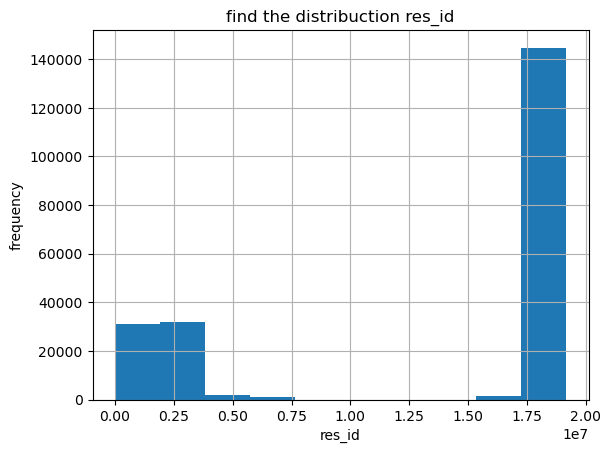

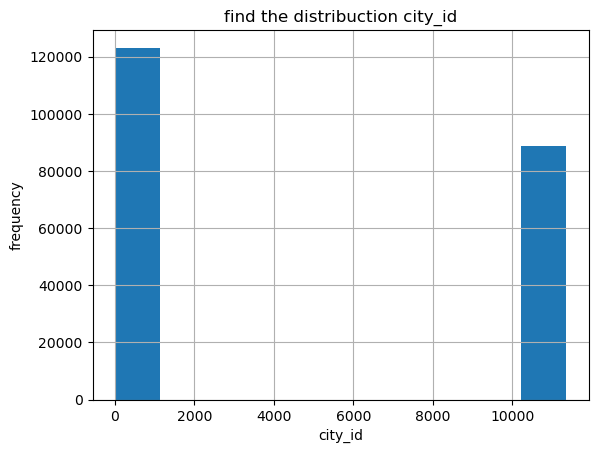

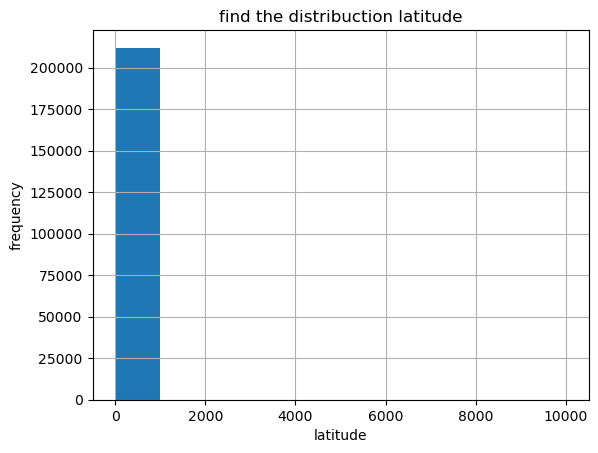

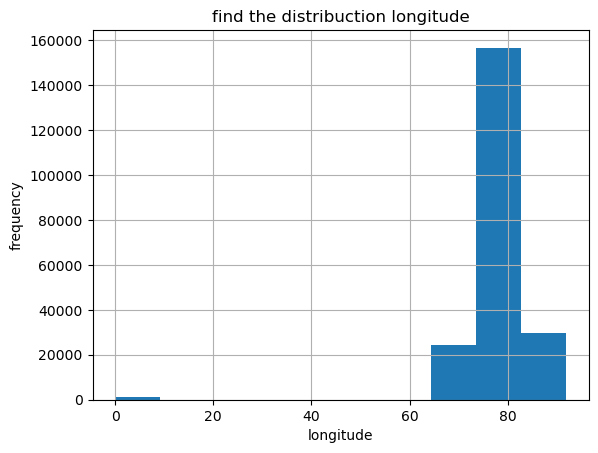

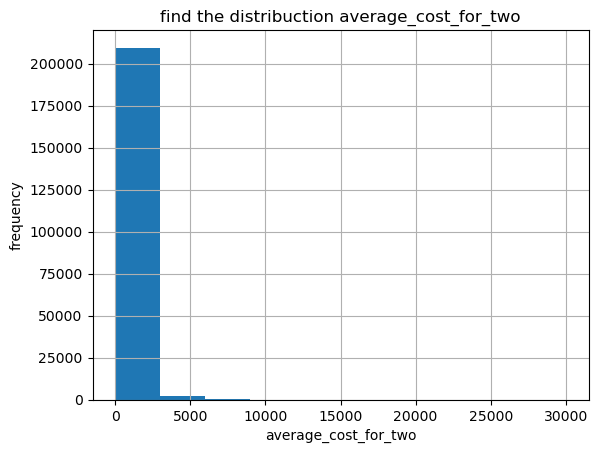

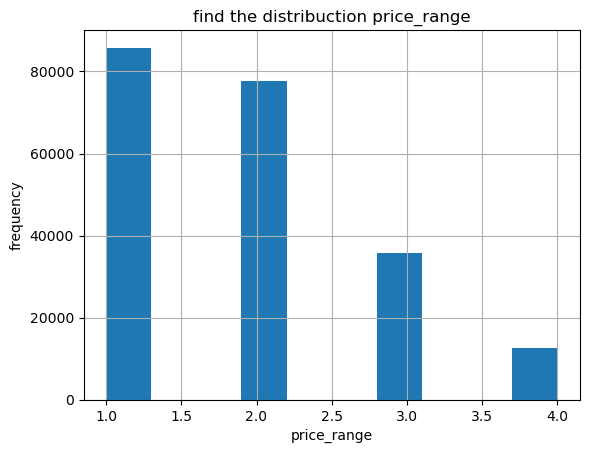

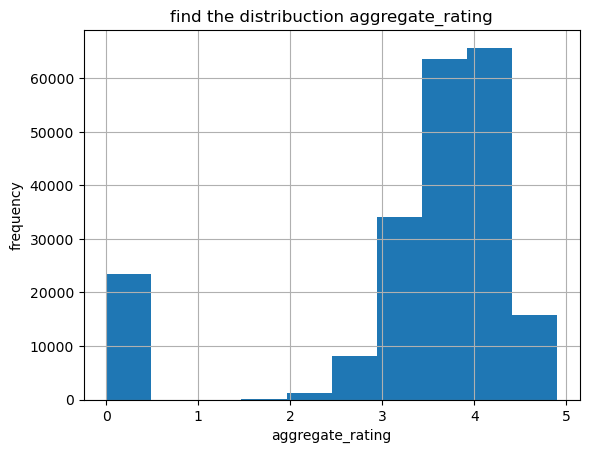

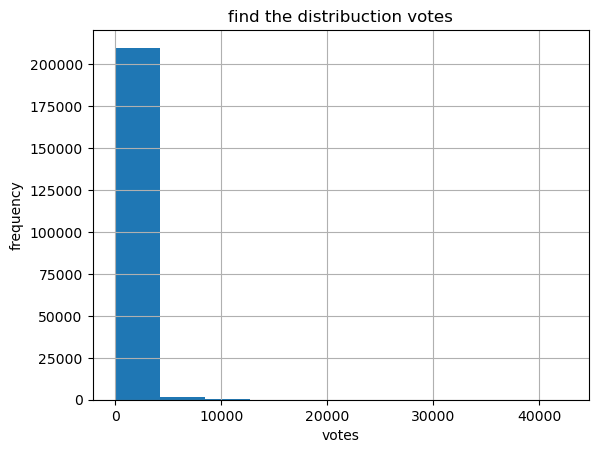

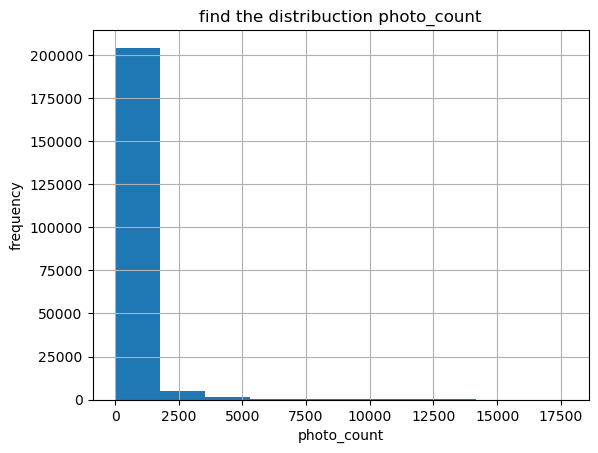

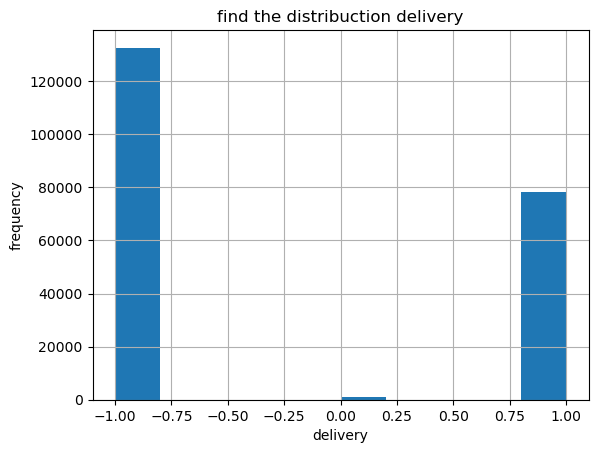

In [66]:
# Histogram  in num columns
for x in numeric_col:
    data[x].hist()
    plt.title(f"find the distribuction {x}")
    plt.xlabel(x)
    plt.ylabel('frequency')
    plt.show()
    

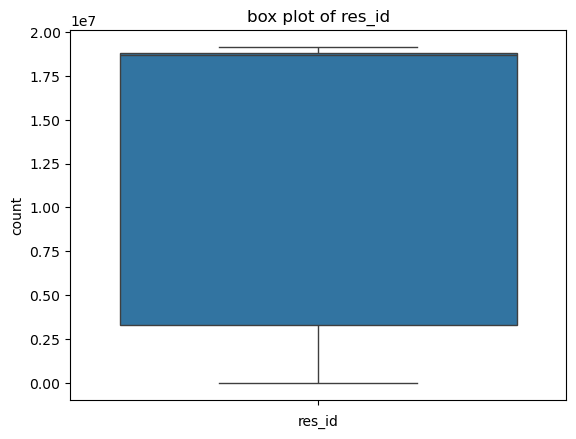

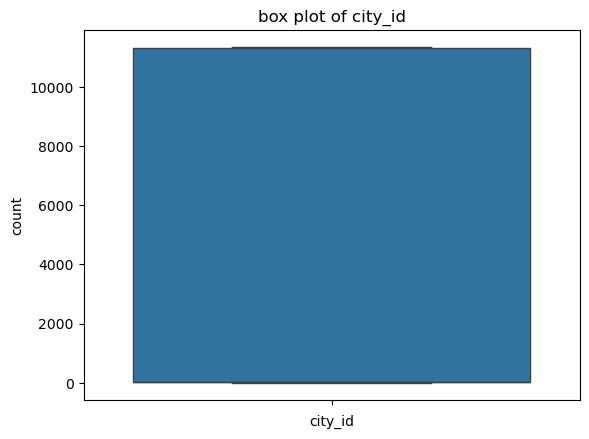

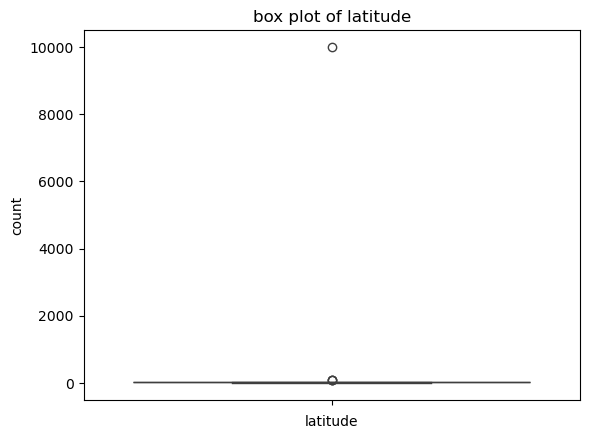

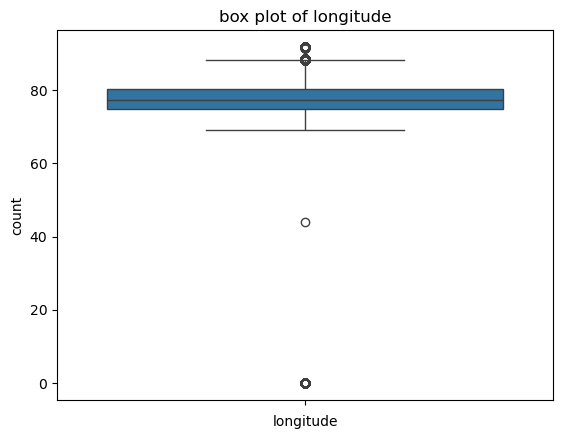

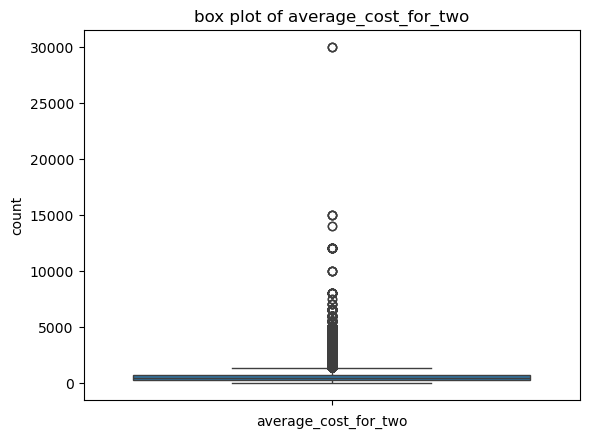

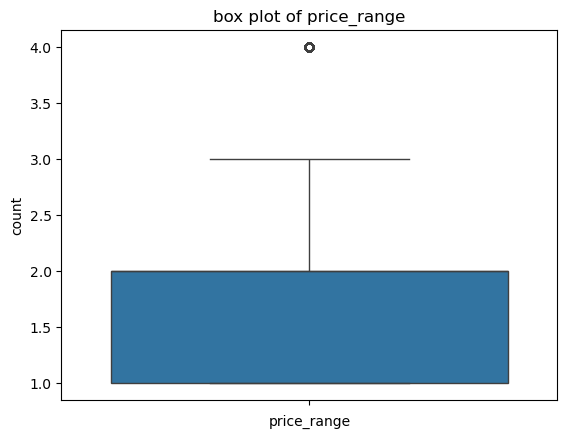

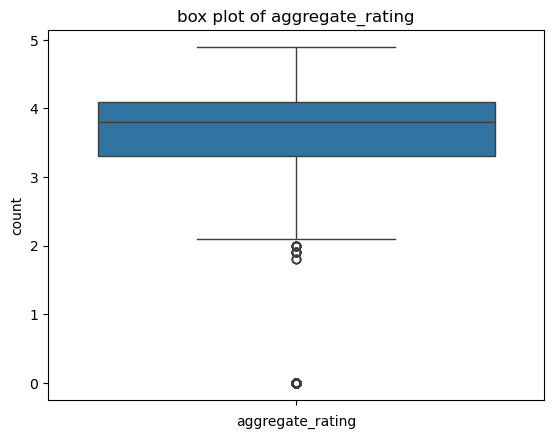

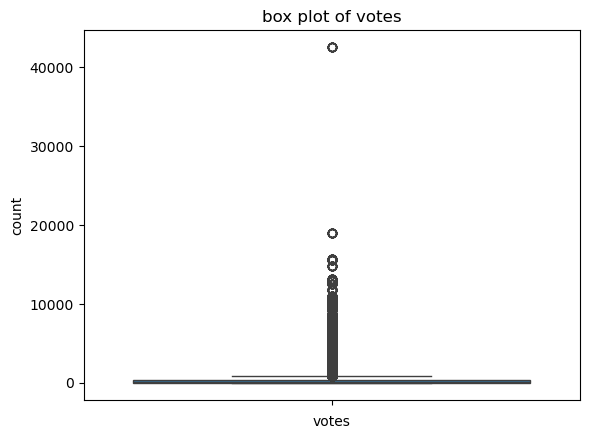

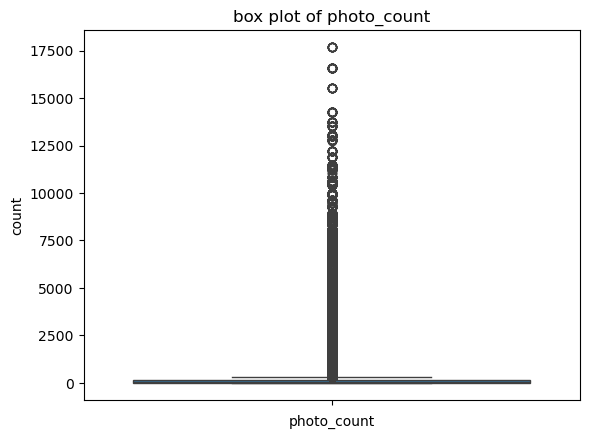

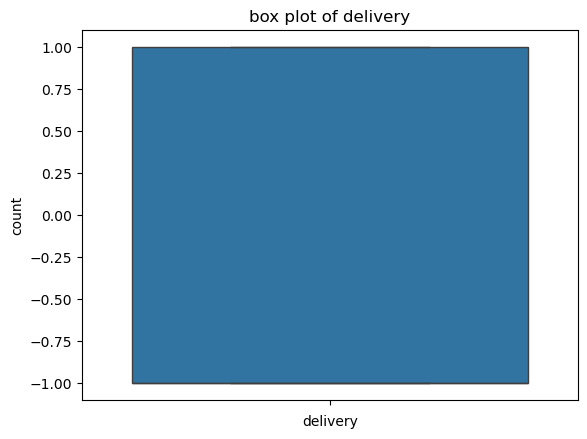

In [67]:
# Boxplot in numeric columns
#Box plot in numeric columns
for x in numeric_col:
     plt.figure()
     sns.boxplot(data=data[x])
     plt.title(f'box plot of {x}')
     plt.xlabel(x)
     plt.ylabel('count')
     plt.show()


In [68]:
## slove the outlayiers ##
#remove outlayer using  IQR method
q1 = data[numeric_col].quantile(0.10)
q2 = data[numeric_col].quantile(0.80)
q3 = q2 - q1

data = data [~((data[numeric_col] < (q1 -1.5 * q3)) | (data[numeric_col] > (q2 +1.5 * q3))).any(axis=1)]
q3


res_id                  1.875176e+07
city_id                 1.130600e+04
latitude                1.579468e+01
longitude               7.406635e+00
average_cost_for_two    6.500000e+02
price_range             2.000000e+00
aggregate_rating        4.200000e+00
votes                   4.760000e+02
photo_count             1.960000e+02
delivery                2.000000e+00
dtype: float64

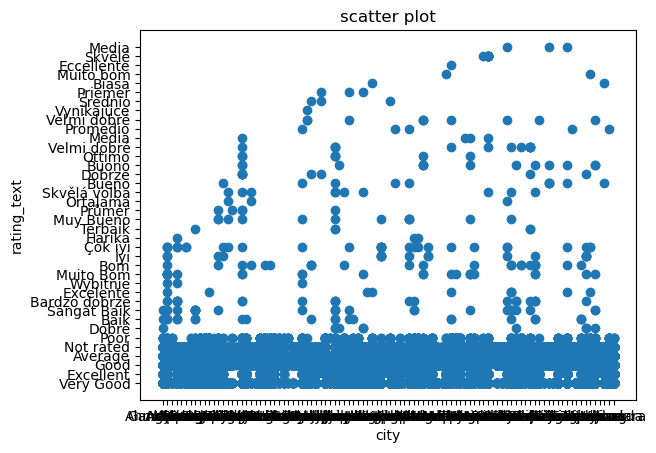

In [69]:
## scatter plot in catgorical columns
import pandas as pd
import matplotlib.pyplot as plt
plt.scatter (data["city"],data["rating_text"])
plt.title("scatter plot")
plt.xlabel("city")
plt.ylabel("rating_text")
plt.show()

<Axes: xlabel='city', ylabel='rating_text'>

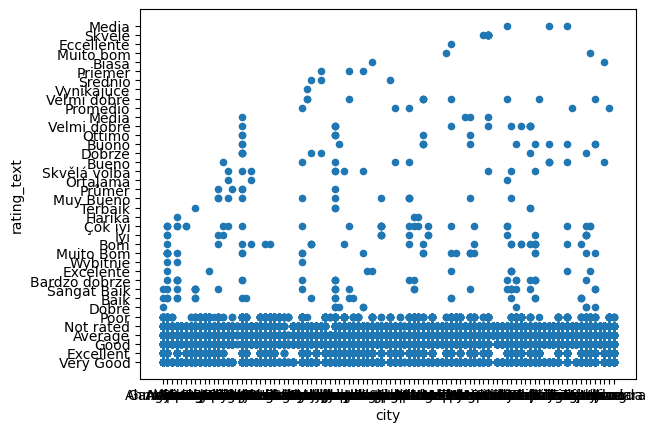

In [70]:
data.plot.scatter(x ='city',y = 'rating_text')

<Axes: >

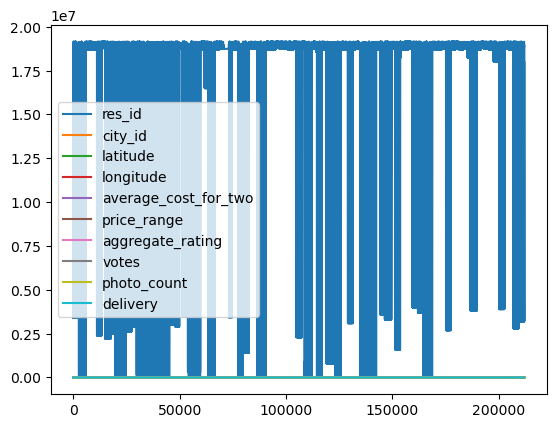

In [71]:
## LINE PLOT 
data.plot.line()

<Axes: xlabel='rating_text'>

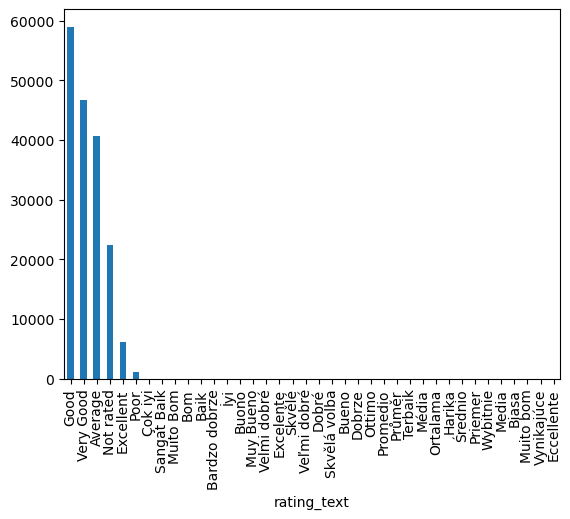

In [72]:
## BAR CHART  ##
data ['rating_text'].value_counts().plot.bar()

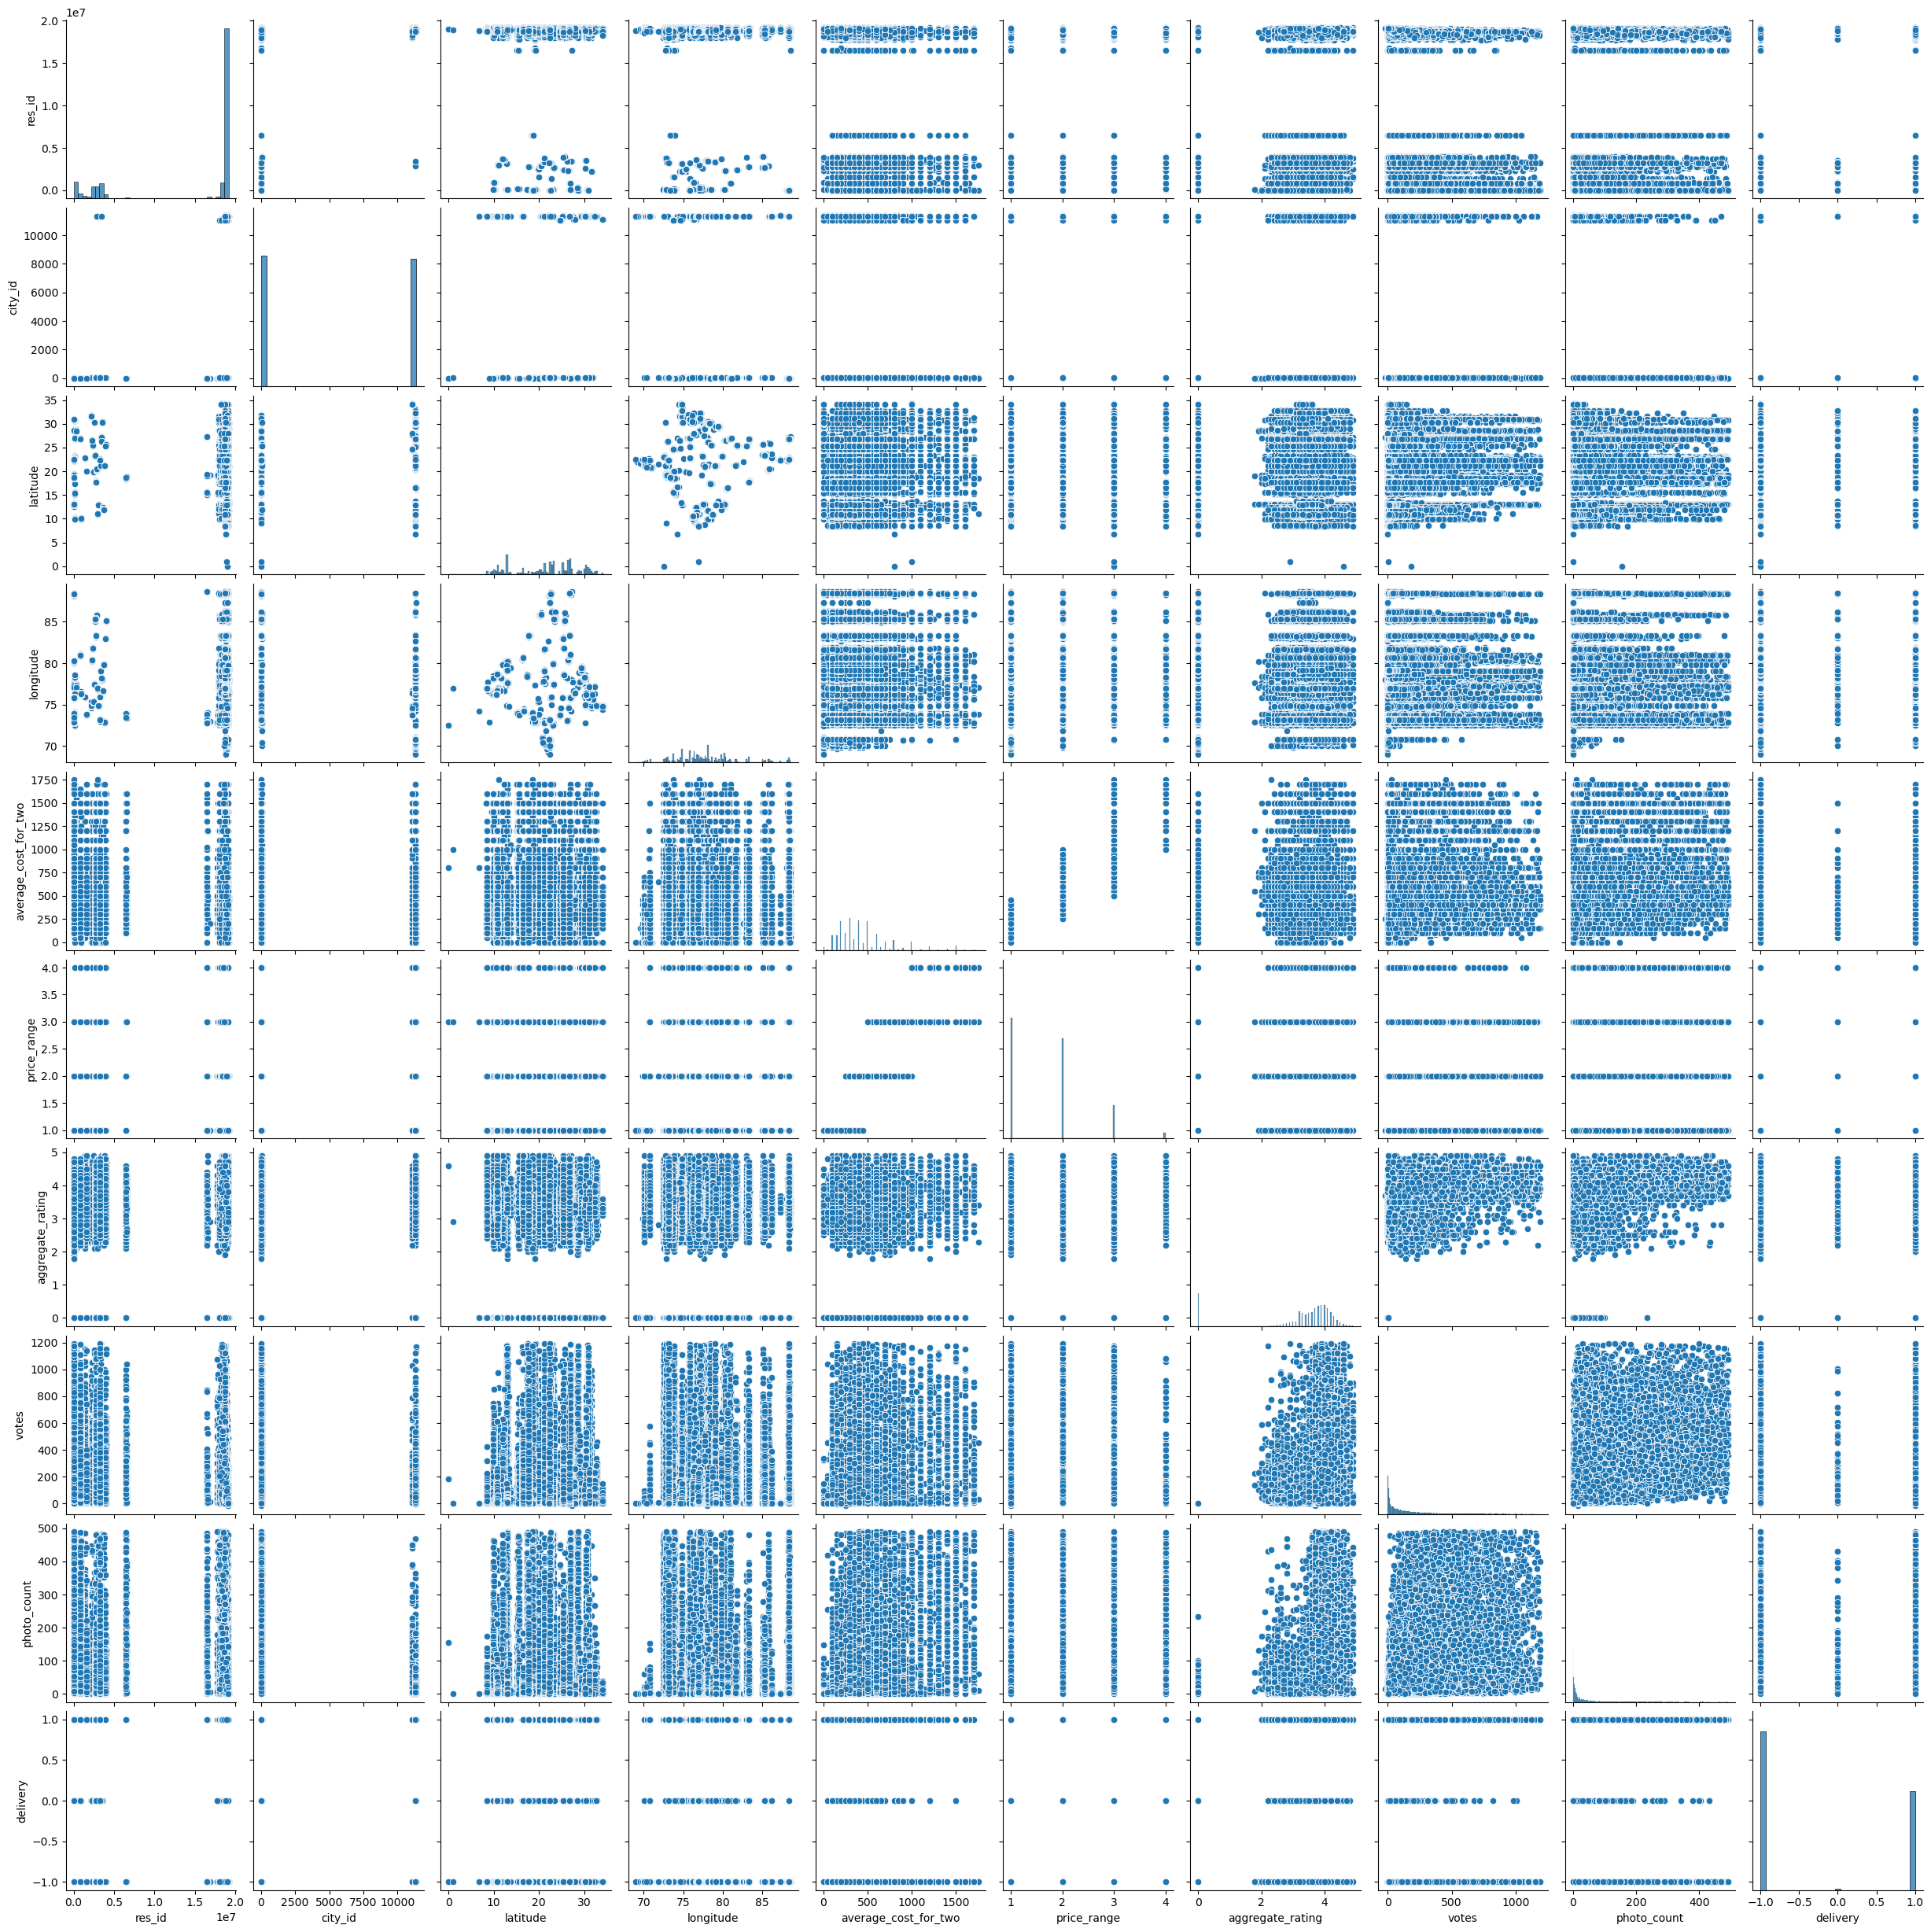

In [73]:
## DATA EXPLORATION TECHNIQUES ##
# pairplot (with seaborn) #
import seaborn as sns 
sns.pairplot(data)


<Axes: >

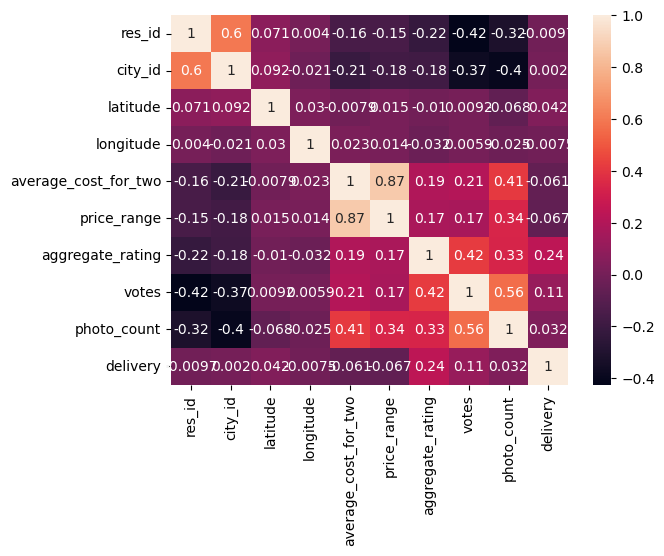

In [74]:
# Heatmap
# #calculate correlation matrix
correlation_matrix =data[numeric_col].corr()
sns.heatmap(correlation_matrix, annot = True)

